1. 문제정의
- 500명의 키와 몸무게 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어 보자.

2. 데이터수집
- BMI 데이터

In [4]:
import pandas as pd
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리
from sklearn.neighbors import KNeighborsClassifier # KNN 분류모델
from sklearn import metrics # 평가를 위한 라이브러리

In [10]:
tbl = pd.read_csv('data/bmi_500.csv', index_col = 'Label') # 인덱스는 라벨로.
tbl.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [11]:
tbl.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [12]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [13]:
tbl.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [14]:
tbl.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

3. EDA

In [24]:
def myScatter (label, color):
    tmp = tbl.loc[label]
    plt.scatter(tmp['Weight'],
               tmp['Height'],
               c = color,
               label = label) # 그래프 그리는 함수

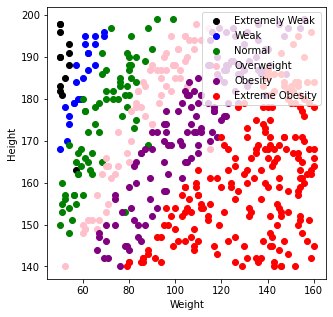

In [28]:
plt.figure(figsize = (5,5)) # 가로, 세로 크기
myScatter('Extremely Weak', 'black')
myScatter('Weak', 'blue')
myScatter('Normal', 'green')
myScatter('Overweight', 'pink')
myScatter('Obesity', 'purple')
myScatter('Extreme Obesity', 'red')
plt.legend(loc = 'upper right')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [70]:
data = pd.read_csv('data/bmi_500.csv')

In [76]:
data.sample(frac=1).reset_index(drop=True) # 데이터 섞기 frac-데이터 퍼센트

,Gender,Height,Weight,Label
0,Female,176,121,Obesity
1,Male,148,155,Extreme Obesity
2,Female,168,135,Extreme Obesity
3,Female,166,153,Extreme Obesity
4,Male,174,95,Obesity
...,...,...,...,...
495,Female,160,124,Extreme Obesity
496,Female,177,117,Obesity
497,Female,184,147,Extreme Obesity
498,Male,169,141,Extreme Obesity


In [58]:
data.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [59]:
X = data.loc[:,'Height':'Weight']
y = data.loc[:, 'Label']

In [60]:
X_train = X.iloc[:350, : ] #7부분이 350 까지니까. # 학습용 문제 데이터 7
X_test = X.iloc[350:, : ] # 평가용 문제 데이터 3

y_train = y.iloc[:350] # 학습용 정답 데이터
y_test = y.iloc[350:]

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


In [ ]:
# knn 모델 하이퍼파라미터 디폴트값
# n_neighbors = 5
# weights = 'uniform'
# metric = 'minkowski'
# p = 2 (1=맨해튼 2= 유클리디안)

In [77]:
knn_model = KNeighborsClassifier(n_neighbors = 10, weights = 'distance', metric='euclidean')

In [63]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [64]:
pre = knn_model.predict(X_test) # 컴퓨터가 예상한 답

In [65]:
metrics.accuracy_score(pre,y_test)

0.9333333333333333

# 활용하기

In [67]:
knn_model.predict([[100,100],[185,120]])

array(['Extreme Obesity', 'Obesity'], dtype=object)